# k - Means and Unsupervised Machine Learning
## 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

%matplotlib inline

## 02. Data

In [2]:
fset = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_lap_full.pkl")
fset.head(1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,code,forename,surname,nationality,lap_num,lap_pos,lap_time,lap_milli,status,year
0,22131,900,825,1,20,4,2.0,2,2,18.0,...,MAG,Kevin,Magnussen,Danish,1,3,01:45.4,105402,Finished,2014


In [3]:
fset.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number               int64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
raceTimeMilli      float64
fastestLap         float64
rank                 int64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
constructorRef      object
name                object
con_nat             object
driverRef           object
code                object
forename            object
surname             object
nationality         object
lap_num              int64
lap_pos              int64
lap_time            object
lap_milli            int64
status              object
year                 int64
dtype: object

In [4]:
#removing non-numerical columns
sub = fset.drop(['positionText','fastestLapTime','constructorRef','name','con_nat','driverRef','code','forename','surname','nationality','lap_time','status'],
               axis = 1)
sub.head(1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli,year
0,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,1,3,105402,2014


In [5]:
sub.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number               int64
grid                 int64
position           float64
positionOrder        int64
points             float64
laps                 int64
raceTimeMilli      float64
fastestLap         float64
rank                 int64
fastestLapSpeed    float64
statusId             int64
lap_num              int64
lap_pos              int64
lap_milli            int64
year                 int64
dtype: object

In [6]:
sub.shape

(206419, 19)

In [7]:
sub = sub.dropna(axis = 0)

In [8]:
#dropping lap times above 100k milliseconds
sub = sub.drop(sub[sub.lap_milli > 100000].index)
sub

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli,year
1,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,2,3,97435,2014
2,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,3,3,97917,2014
3,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,4,3,96796,2014
4,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,5,3,96766,2014
5,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,6,3,95857,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206011,22048,896,8,208,7,6,7.0,7,6.0,60,5540175.0,60.0,1,210.426,1,55,3,91684,2013
206012,22048,896,8,208,7,6,7.0,7,6.0,60,5540175.0,60.0,1,210.426,1,56,5,93911,2013
206013,22048,896,8,208,7,6,7.0,7,6.0,60,5540175.0,60.0,1,210.426,1,57,5,92648,2013
206014,22048,896,8,208,7,6,7.0,7,6.0,60,5540175.0,60.0,1,210.426,1,58,7,96345,2013


## 03. Elbow

In [9]:
#determining optimal number of clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]
score

C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\clust

[-6.531020913625899e+16,
 -2.4916798268534708e+16,
 -1.3084480320848784e+16,
 -7847241073804117.0,
 -4935765136309897.0,
 -2968886464061894.5,
 -1751849635524703.5,
 -1343701111415897.2,
 -1037097485132171.8]

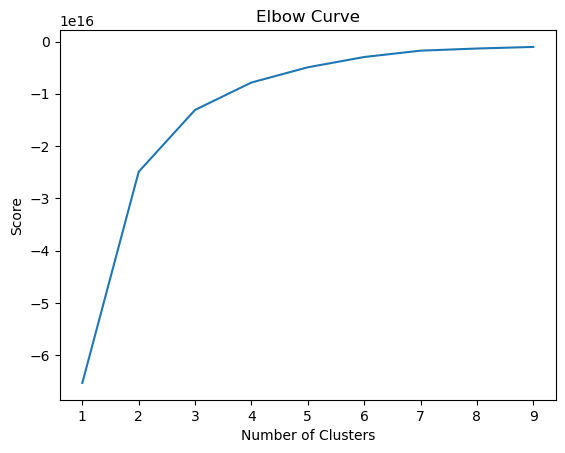

In [10]:
#plotting results
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal number is 4 clusters. Curve begins to flatten at 4.
## 04. Clustering with K-Means

In [11]:
#creating k-means object
kmeans = KMeans(n_clusters = 4) #assigning cluster
kmeans.fit(sub) #fitting model with data
sub['clusters'] = kmeans.fit_predict(sub)
sub.head()

C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,raceTimeMilli,fastestLap,rank,fastestLapSpeed,statusId,lap_num,lap_pos,lap_milli,year,clusters
1,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,2,3,97435,2014,0
2,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,3,3,97917,2014,0
3,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,4,3,96796,2014,0
4,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,5,3,96766,2014,0
5,22131,900,825,1,20,4,2.0,2,18.0,57,5605487.0,49.0,6,205.131,1,6,3,95857,2014,0


In [12]:
sub['clusters'].value_counts()

0    36832
2    28705
1     5278
3     1488
Name: clusters, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

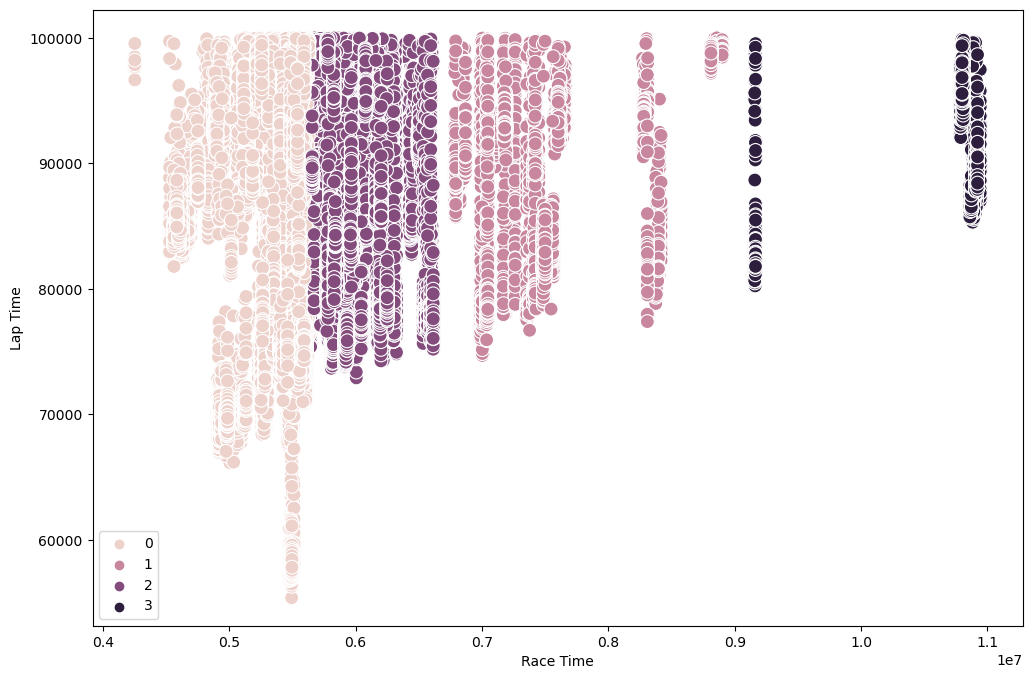

In [13]:
#plotting
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['raceTimeMilli'], y=sub['lap_milli'], hue=kmeans.labels_, s=100)
plt.xlabel('Race Time')
plt.ylabel('Lap Time')
plt.show

This one turned out well. While there is not an over-arching corralation between lap times and race times, There is certainly a pattern. With my knowledge of the subject what this represents is the impact of circuits on overall race and lap times. Shorter circuits may have shorter lap times but more laps leading to low lap times but longer races. This goes for longer tracks with longer lap times but less laps. This explains why the shortest race times have laps times closer to the 100k millisecond cap I placed on the analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

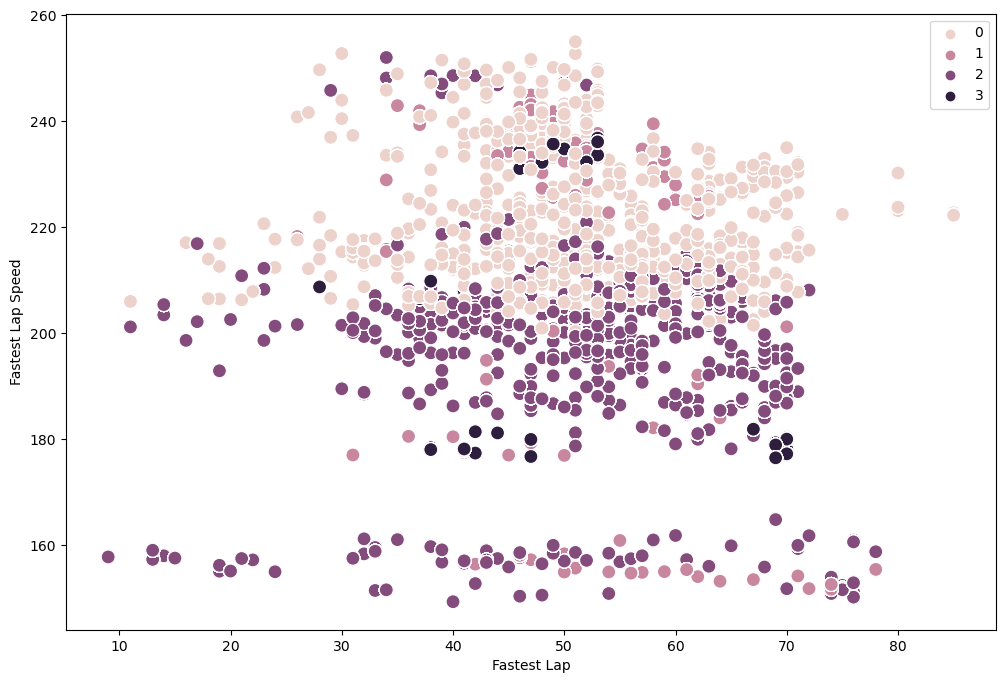

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['fastestLap'], y=sub['fastestLapSpeed'], hue=kmeans.labels_, s=100)
plt.xlabel('Fastest Lap')
plt.ylabel('Fastest Lap Speed')
plt.show

This does not make sense yet. May need to incorporate new variables.

In [20]:
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
sub.groupby('cluster').agg({'fastestLap':['mean', 'median'],
                         'fastestLapSpeed':['mean', 'median'],
                         'lap_milli':['mean', 'median'],
                          'raceTimeMilli':['mean', 'median']
})

fastestLap        fastestLapSpeed              lap_milli           \
                  mean median            mean   median          mean   median   
cluster                                                                         
black        50.139113   48.0      205.621059  208.180  88644.627688  88062.5   
dark purple  52.337676   54.0      193.353448  199.755  86226.605783  83861.0   
pink         52.760480   52.0      222.020989  219.492  84492.619353  86868.5   
purple       52.583554   52.0      204.038172  222.526  88172.236643  89308.0   

            raceTimeMilli              
                     mean      median  
cluster                                
black        1.027759e+07  10799457.0  
dark purple  6.001727e+06   5931915.0  
pink         5.268479e+06   5325632.0  
purple       7.547488e+06   7411507.0

## Insights:
The analysis indicates that the incorperation of more variables is required. The beginings of what looks like a relationship between some variables is there, but given all the layers, the analysis may need to be more specific or the categories divided differently to gain real insights and an acurate analysis.